In [2]:
import numpy as np
import matplotlib.pyplot as plt
import plumed
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import math

# Short analysis of the biased run

## Biased vs unbiased distance
We compare the CV distance from the unbiased run of 20 ns and the same distance computed within the biased run in metadynamics. 

The option `STRIDE=1` captures all the "checkpoints" sampled by gromacs. According to the `.mdp` file (located at `simulations/nmRec_Ca/mdp`), we are sampling quantities with a rate of 10 ps, namely every 5000 steps. The `PACE` of deposition of Gaussians is equal to 100 (steps, I suppose). Probably we will need also the `.edr` file. Probably the `PACE` parameter has to be increased to reach a quasi-equilibrium configuration between each deposition.

Also, consider that rewighting will not be effective when the bias potential is changing too much in time. 



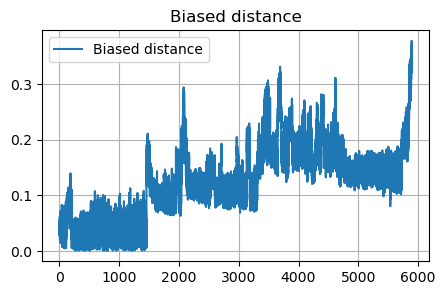

In [4]:
with open("HILLS") as f:
    lines = (line for line in f if not line.startswith('#'))
    HILLS = np.loadtxt(lines)

bias_times = []
bias_dist = []

for i in range(len(HILLS)):
    bias_times.append(HILLS[i][0])
    bias_dist.append(HILLS[i][1])


plt.rcParams["figure.figsize"] = (5, 3)
plt.plot(bias_times, bias_dist, label=r'Biased distance')
plt.title("Metadynamics")
plt.grid()
plt.legend(loc="best")

## Visualization of the HILLS file
When the height goes to zero it means that you are not adding a lot of bias
IMPORTANT: when you deal with a real simulation, you discard the part in which you add a lot of bias.

/var/folders/hn/315sv5754l3bwzn1_mtrpscc0000gn/T/ipykernel_4767/3830836202.py:1: UserWarning: cannot load PLUMED instance, conversions will not be available
  data_hills = plumed.read_as_pandas("HILLS")


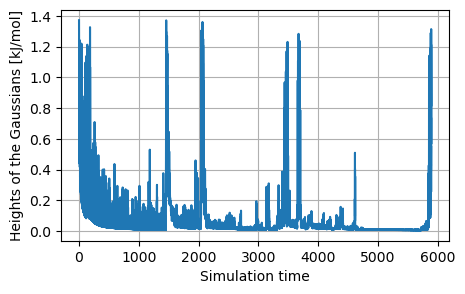

In [5]:
data_hills = plumed.read_as_pandas("HILLS")
plt.plot(data_hills["time"], data_hills["height"])
plt.xlabel("Simulation time")
plt.ylabel("Heights of the Gaussians [kJ/mol]")
plt.grid()

## Assessment of convergence

We use the tool `sum_hills` to judge the convergence of the free energy profile as a function of the simulated time. With this command we generate many free energy files (`fes`), each one containing the estimate of the free energy up to that point in time.
```
plumed sum_hills --hills HILLS --stride 50 --mintozero
```

/var/folders/hn/315sv5754l3bwzn1_mtrpscc0000gn/T/ipykernel_4767/2427889563.py:4: UserWarning: cannot load PLUMED instance, conversions will not be available
  data=plumed.read_as_pandas("FES/fes_"+str(i)+".dat")
/var/folders/hn/315sv5754l3bwzn1_mtrpscc0000gn/T/ipykernel_4767/2427889563.py:4: UserWarning: cannot load PLUMED instance, conversions will not be available
  data=plumed.read_as_pandas("FES/fes_"+str(i)+".dat")
/var/folders/hn/315sv5754l3bwzn1_mtrpscc0000gn/T/ipykernel_4767/2427889563.py:4: UserWarning: cannot load PLUMED instance, conversions will not be available
  data=plumed.read_as_pandas("FES/fes_"+str(i)+".dat")
/var/folders/hn/315sv5754l3bwzn1_mtrpscc0000gn/T/ipykernel_4767/2427889563.py:4: UserWarning: cannot load PLUMED instance, conversions will not be available
  data=plumed.read_as_pandas("FES/fes_"+str(i)+".dat")
/var/folders/hn/315sv5754l3bwzn1_mtrpscc0000gn/T/ipykernel_4767/2427889563.py:4: UserWarning: cannot load PLUMED instance, conversions will not be avail

Text(0, 0.5, 'Free energies [kJ/mol]')

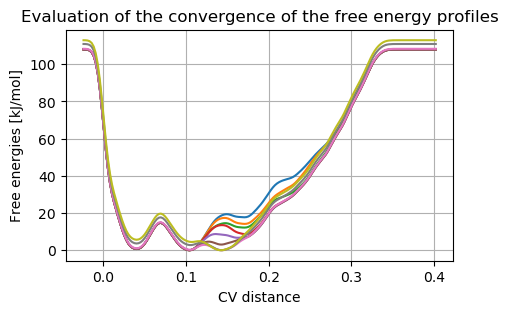

In [9]:
# Plot the fes all together
for i in range(200,290,10):   
    # import fes file into pandas dataset
    data=plumed.read_as_pandas("FES/fes_"+str(i)+".dat")

    plt.plot(data["d1"],data["file.free"], label="up to "+str(i * 50 * 0.2)+" ps")
plt.grid()
plt.title("Evaluation of the convergence of the free energy profiles")
#plt.legend(loc="best")
plt.xlabel(r"CV distance")
plt.ylabel("Free energies [kJ/mol]")

One of the great difficulties we have to face when no knowledge is provided about the free energy landscape, is that even if the system may seem to explore different regions of phase space, it can be stuck inside a single basin. This is insanely difficult to assess.

The dynamics of the CV at a certain point should be diffusive and fluctuations should become more and more important.  

# Free energy difference as a function of time